# Lab 1 - DNA analysis through Python

Nucleotide counts for SEQ1:
{'A': 17, 'C': 8, 'G': 2, 'T': 7}


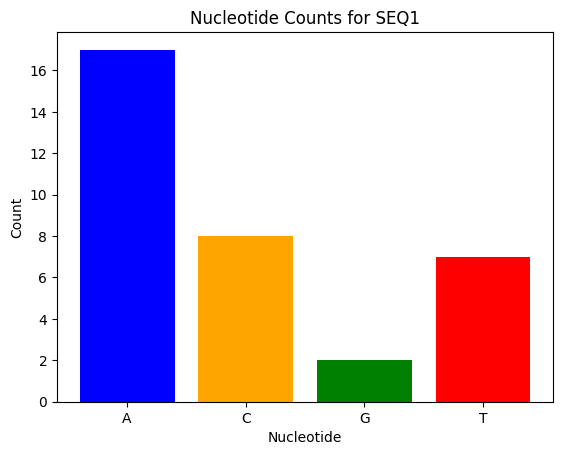

Nucleotide counts for SEQ2:
{'A': 3, 'C': 4, 'G': 10, 'T': 7}


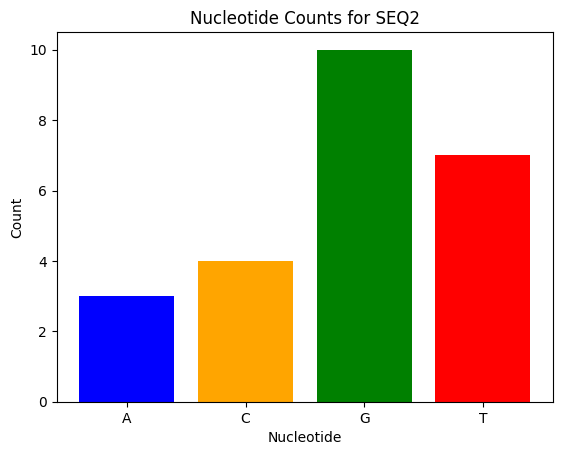

Nucleotide counts for SEQ3:
{'A': 18, 'C': 16, 'G': 16, 'T': 10}


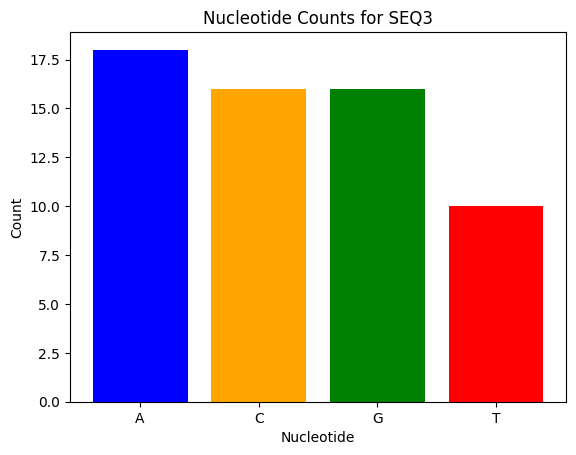

Nucleotide counts for SEQ4:
{'A': 13, 'C': 11, 'G': 18, 'T': 10}


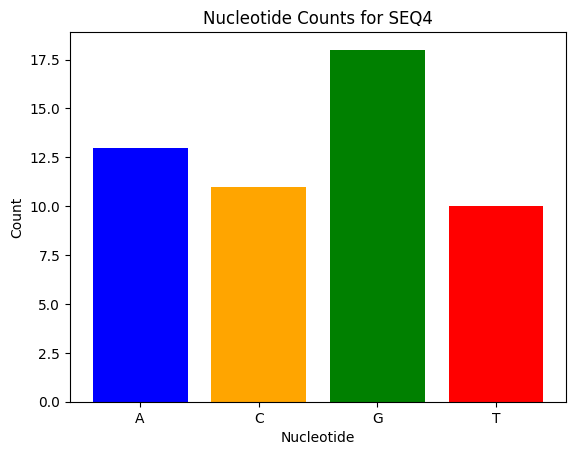

In [ ]:
import matplotlib.pyplot as plt # I will use pyplot to visualize the results

def read_dna_file(filename): # function to read the DNA file making filename a parameter and being reusable
    dna_data = {} # my dictionary to store the data
    seq_id = "" # create an empty string to hold the sequence ID
    dna = "" # create an empty string to hold the DNA sequence

    with open(filename, "r") as txt_file: # open the dna file safely in read mode with the with statement
        for line in txt_file: # iterate through the lines in the file
            line = line.strip().upper() # remove whitespace characters from the beginning and end of the line and convert to uppercase

            if line.startswith(">"): # if the line starts with ">", it is a sequence ID (seq_id)
                if seq_id: # if seq_id is not empty
                    dna_data[seq_id] = dna # store the previous sequence in the dna_data dictionary
                seq_id = line[1:] # update seq_id to start after ">" making it correct
                dna = "" # reset the dna string for the new sequence
            else:
                dna = dna + line # add the line to the dna as a new string

    if seq_id != "": # after the loop, check if there is a last sequence to add
        dna_data[seq_id] = dna # store the last sequence in the dna_data dictionary

    return dna_data # return the dictionary containing all sequences in the txt_file



def count_letters(dna_sequence): # function to count the letters in the DNA sequences
    letter_count = {"A": 0, "C": 0, "G": 0, "T": 0} # create a dictionary to hold the counts of each letter

    for letter in dna_sequence: # iterate through each letter in the DNA sequence
        if letter in letter_count: # if the letter is one of A, C, G, T
            letter_count[letter] += 1 # increment the count for that letter

    return letter_count # return the dictionary with the counts of each letter



def visualize_counts(letter_count, seq_id): # function to visualize the counts using a bar chart
    letters = list(letter_count.keys()) # get the letters (A, C, G, T) as a list
    counts = list(letter_count.values()) # get the counts as a list

    plt.bar(letters, counts, color=["blue", "orange", "green", "red"]) # create a bar chart with specified colors
    plt.xlabel("Nucleotide") # label for the x-axis
    plt.ylabel("Count") # label for the y-axis
    plt.title(f"Nucleotide Counts for {seq_id}") # title of the chart including the sequence ID
    plt.show() # display the bar chart



dna_dict = read_dna_file("dna_raw.txt") # read the DNA file and store the sequences in a dictionary


all_seq_ids = list(dna_dict.keys())[:4] # Get the four sequence IDs

for seq_id in all_seq_ids: # Loop through the all 4 four sequences
    seq = dna_dict[seq_id]  # get the actual sequence
    counts = count_letters(seq)  # count the letters

    print(f"Nucleotide counts for {seq_id}:")
    print(counts)

    visualize_counts(counts, seq_id) # Visualize the counts for this sequence
